## <font color = blue>Problem Statement:
    
**<font color = green>Sales Channel Prediction Case Study:-** 

**<font color = green>When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .
The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.** 

### <font color = blue>Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### <font color = blue>Reading data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\Data Analysis With Python\Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### <font color = blue>Droping Unwanted Column

In [3]:
df = df.drop(columns = 'Unnamed: 0', axis = 1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### <font color = blue>Check no of row and column

In [4]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (200, 4)


### <font color = blue> Checking for Null values

In [5]:
print('----------------------\n')
print(df.isnull().sum())
print('\n----------------------')

----------------------

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

----------------------


#### <font color = green>There is no null value

### <font color = blue> Information about dataset

In [6]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

----------------------------------------------------


#### <font color = green>All features are in float

### <font color=blue>Statistic of Dataset

In [7]:
# We use describe command to extracte statistical infomation about dataset.
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### <font color = blue>Plot graph to visualize how data is distributed in every column


Distribution Plot :-



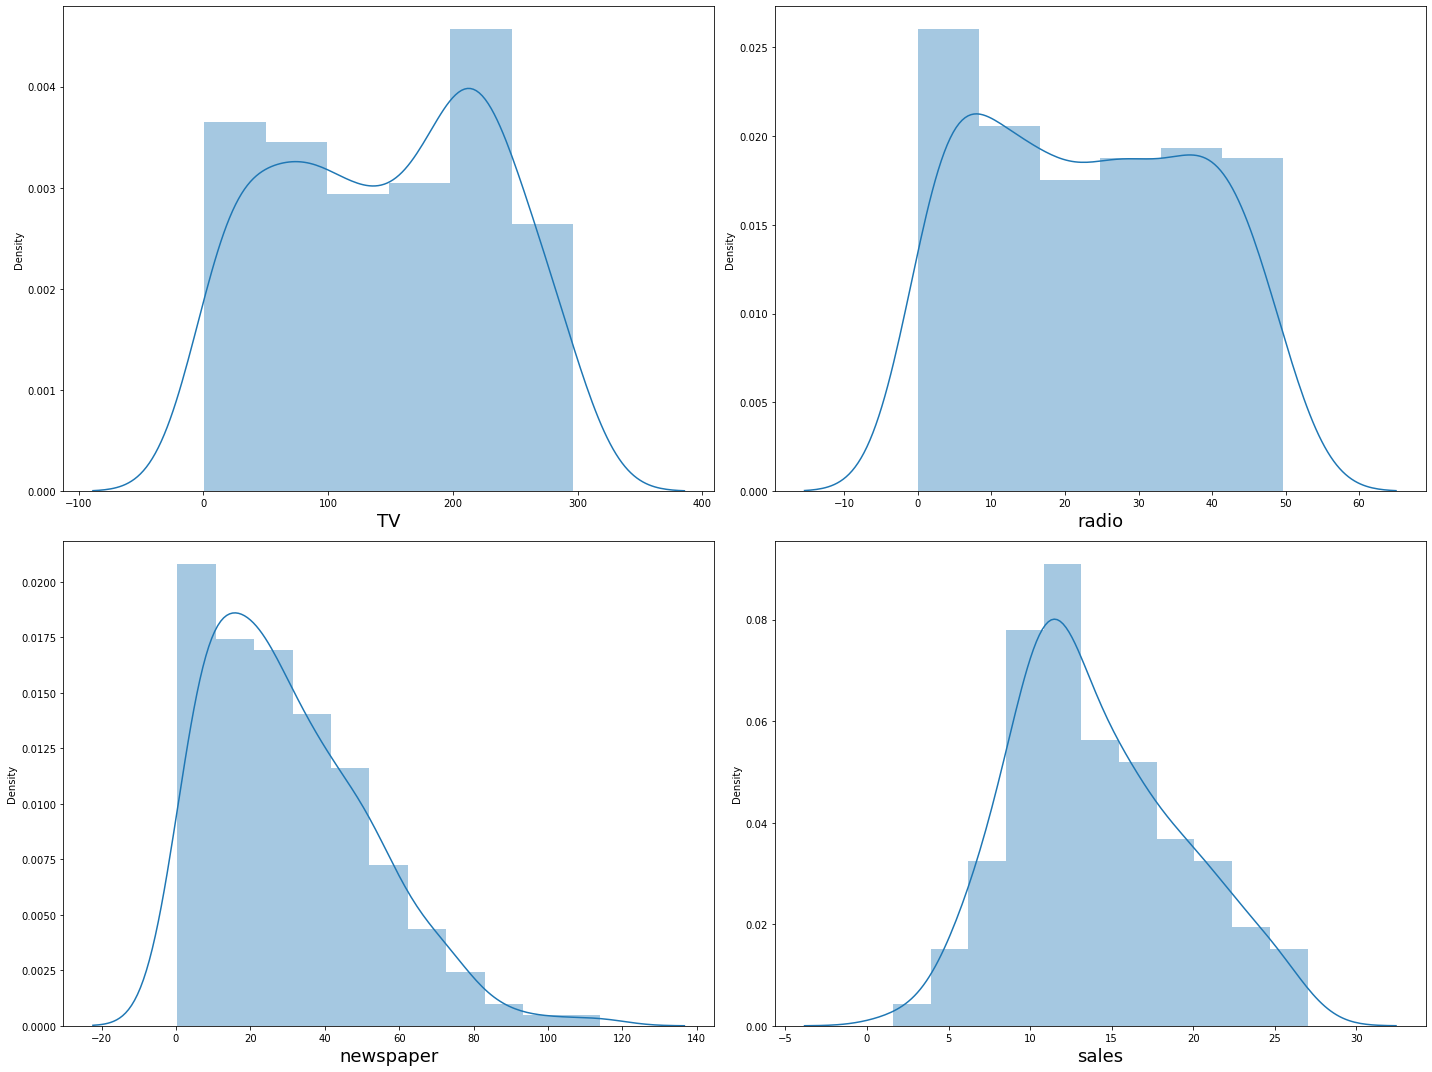

In [8]:
# Let' see how data is distributed in every columns.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=4:
        ax = plt.subplot(2,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### <font color = green> some column are skewed 

### <font color = blue>Removing outliers and verify it

In [9]:
# with std 3 Lets see the stats

z_score = zscore(df[['TV', 'radio', 'newspaper']]) # use only continous data
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

df = df[filtering_entry]


Distribution Plot :-



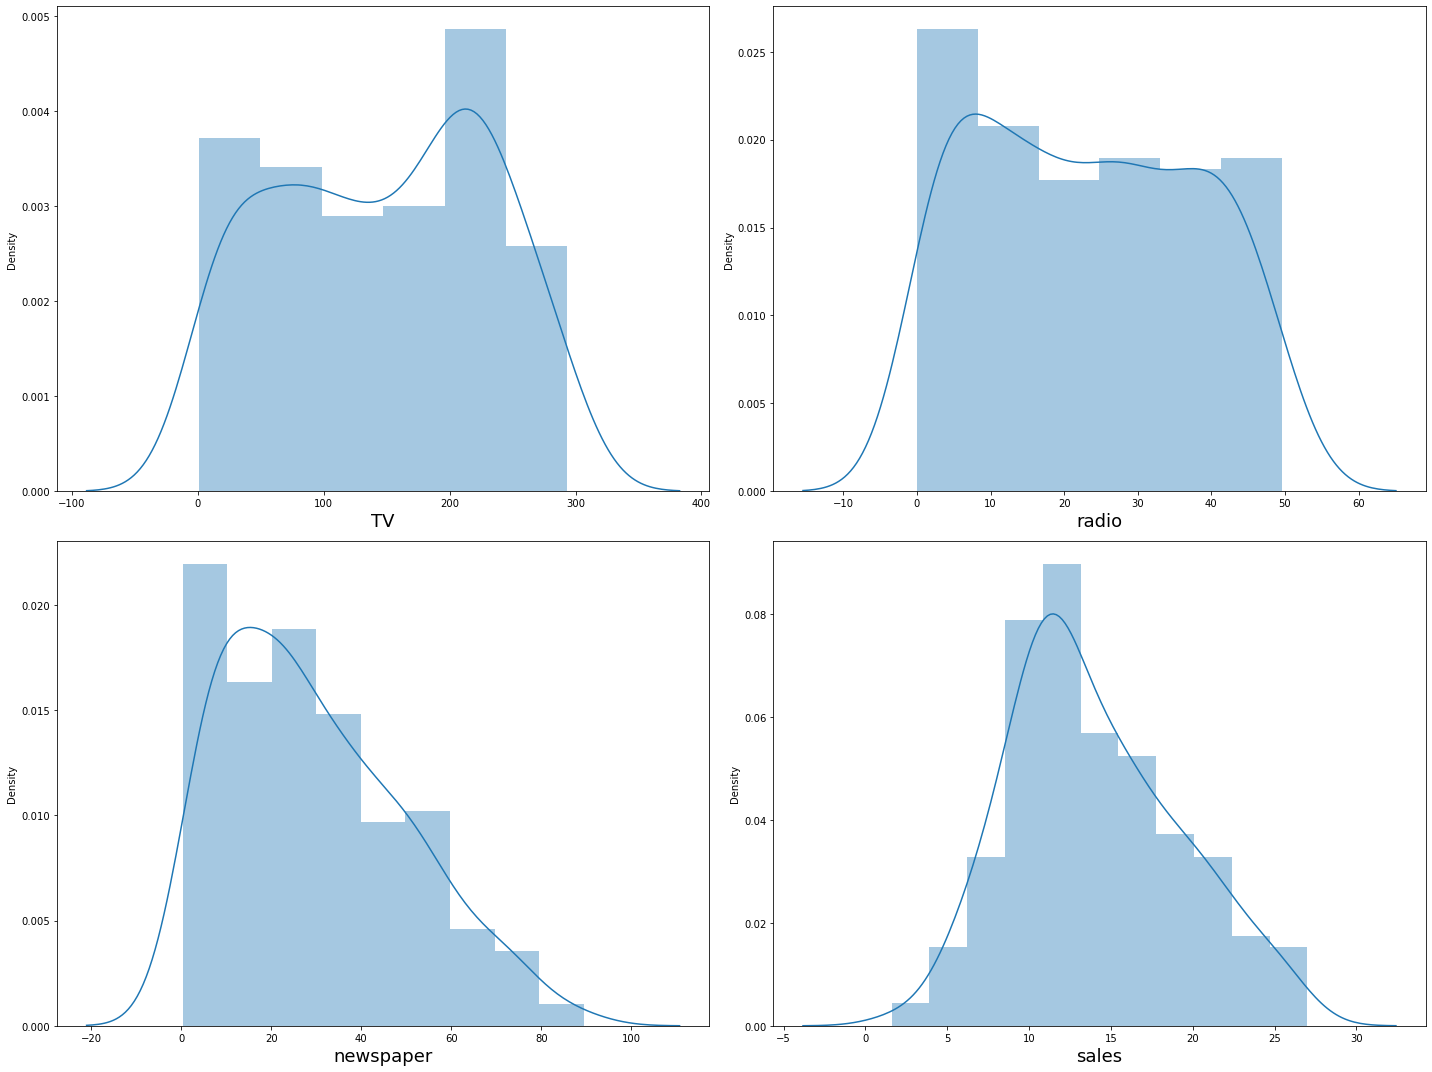

In [10]:
# Let' see outliers remove or not.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=4:
        ax = plt.subplot(2,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

In [11]:
print('Checking No of Rows and Columns After Removing Outliers ----->', df.shape )

Checking No of Rows and Columns After Removing Outliers -----> (198, 4)


#### <font color = green>Outliers are removed

### <font color=blue>Visualizing relationship

In [12]:
TV= df.groupby('sales')['TV'].sum()
TV

sales
1.6       0.7
3.2       4.1
4.8       8.6
5.3      18.5
5.5       7.3
        ...  
24.7    220.3
25.4    799.8
25.5    283.6
26.2    287.6
27.0    276.9
Name: TV, Length: 121, dtype: float64

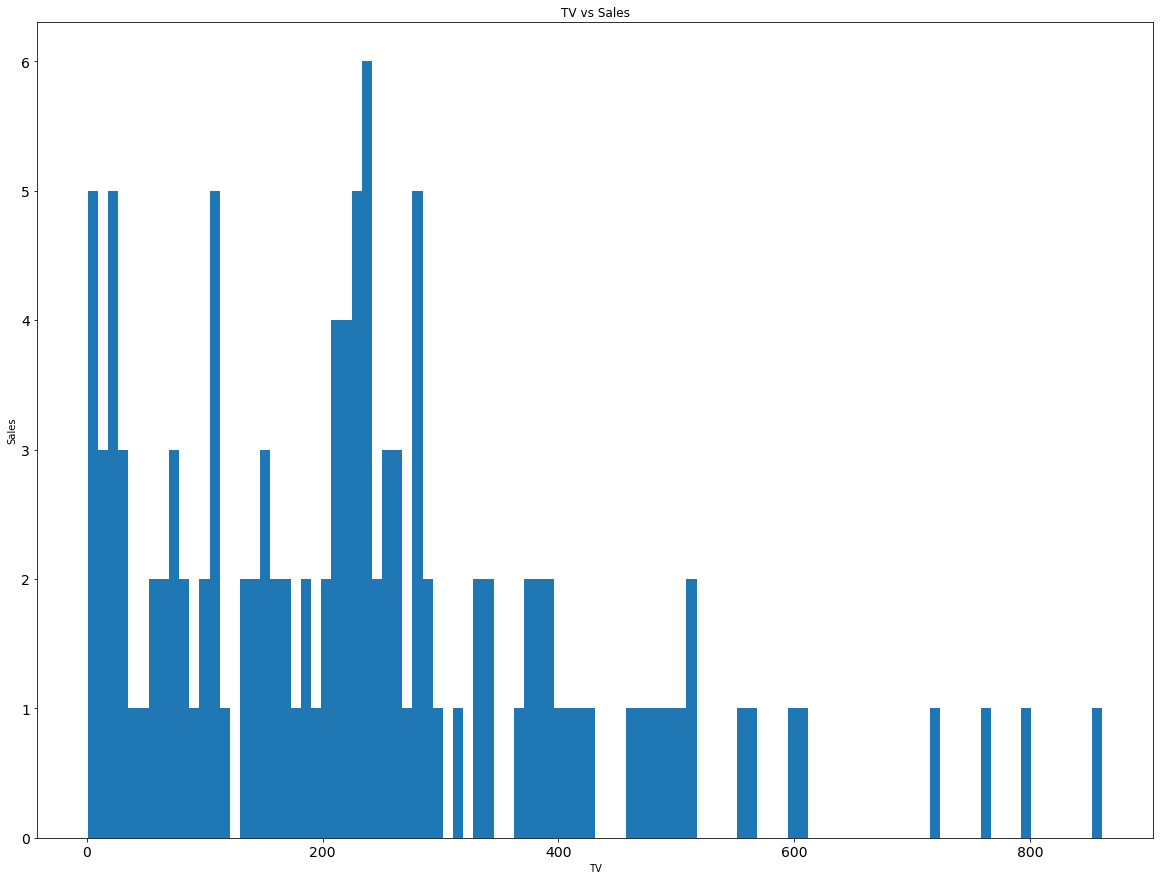

In [13]:
TV.plot.hist(figsize = (20,15), fontsize = 14, bins = 100)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

#### <font color=green> Range 10 to 15 highest sales

In [14]:
radio = df.groupby('radio')['sales'].sum()
radio

radio
0.0      8.8
0.3      8.7
0.4      5.3
0.8      9.4
1.3     10.1
        ... 
47.8    16.7
48.9    34.2
49.0    50.1
49.4    38.4
49.6    23.8
Name: sales, Length: 165, dtype: float64

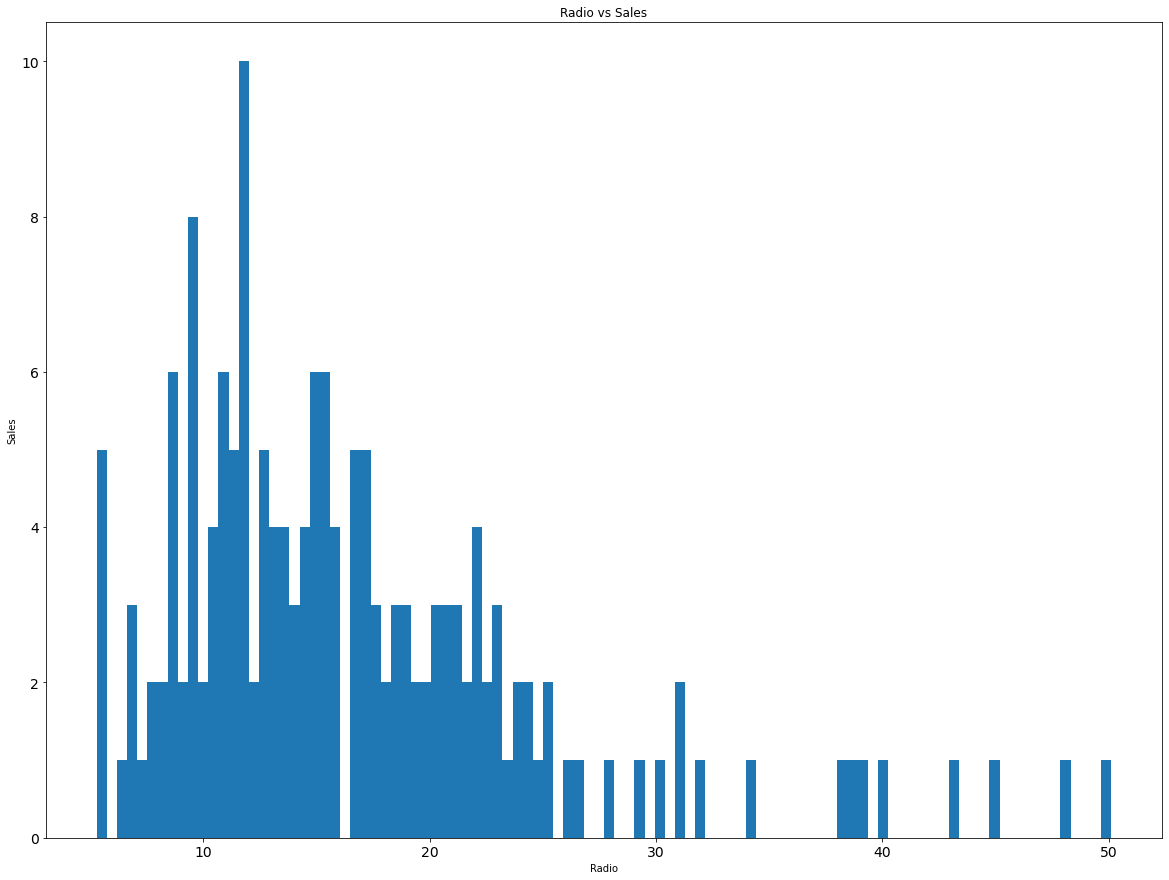

In [15]:
radio.plot.hist(figsize = (20,15), fontsize = 14, bins = 100)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')
plt.show()

#### <font color=green> Range of 5 to 15 highest sales

In [16]:
newsp= df.groupby('newspaper')['sales'].sum()
newsp

newspaper
0.3     17.4
0.9      9.3
1.0      4.8
1.7     20.7
1.8     20.7
        ... 
75.0     7.2
75.6    19.2
79.2    15.9
84.8    11.9
89.4     8.7
Name: sales, Length: 170, dtype: float64

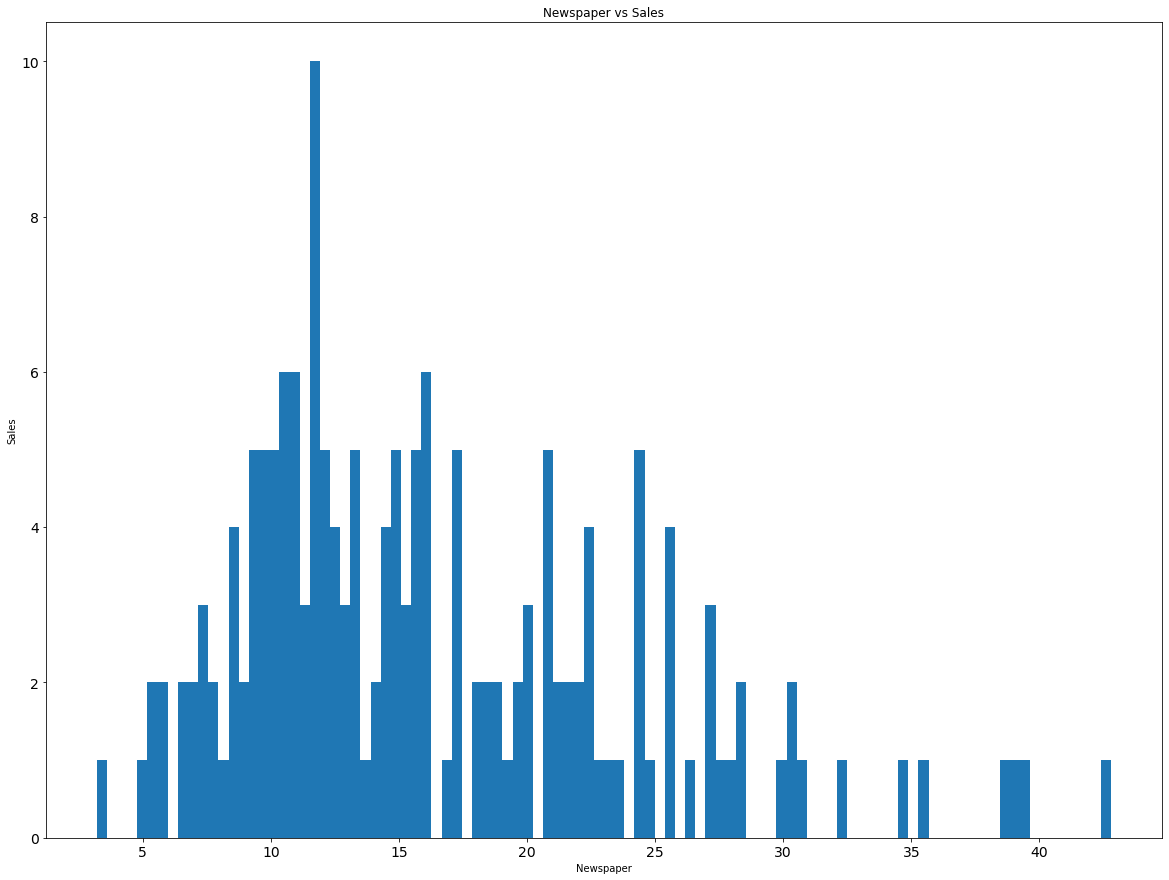

In [17]:
newsp.plot.hist(figsize = (20,15), fontsize = 14, bins = 100)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')
plt.show()

#### <font color=green>Range 10 to 12 highest sales

### <font color = blue> Spliting data into features and label

In [18]:
x = df.drop('sales', axis = 1)
y = df['sales']


Relationship Plot :-



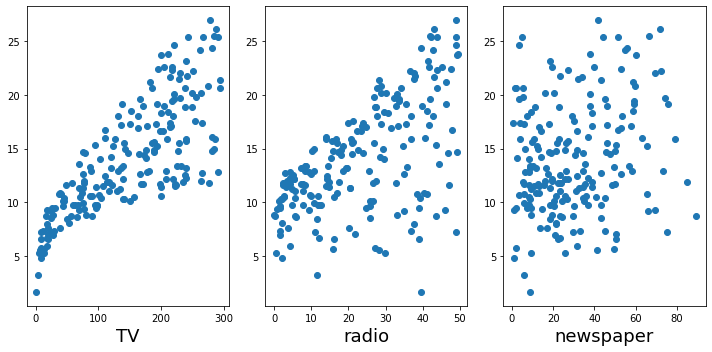

In [19]:
# Let' see how data is related to label .
print('\nRelationship Plot :-\n')

plt.figure(figsize = (10,5), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=4:
        ax = plt.subplot(1,3, plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### <font color=green> Newspaper not showing positive trends 

### <font color=blue>Plotting Heatmap 

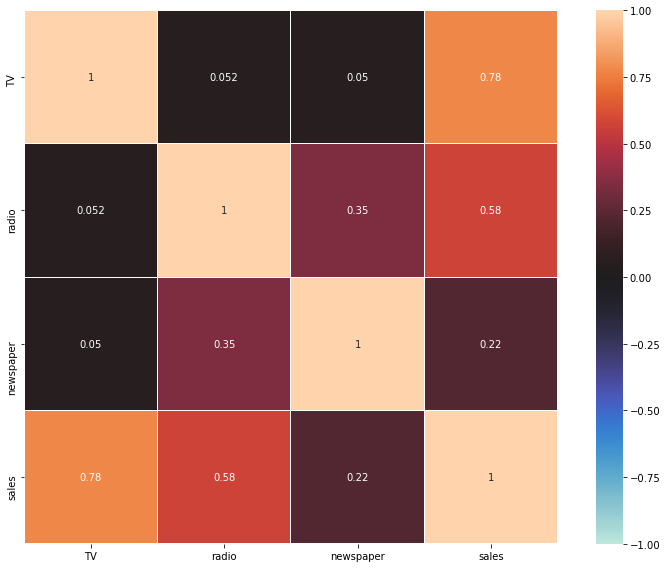

In [20]:
df_corr = df.corr().abs()

plt.figure(figsize = (11,8))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1 )
plt.tight_layout()

#### <font color = green>Observation : TV show maximum relation and newspaper show minimum relation with sales.

### <font color=blue> Checking for skewness

In [21]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

#### <font color = green>Observation : No skewness is present in dataset

### <font color = blue> Data Scaling

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

### <font color = blue>OLS Result

In [23]:
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           8.35e-95
Time:                        17:13:34   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
TV             0.0457      0.001     32.293      0.000       0.043       0.048
radio          0.1886      0.009     21.772      0.000       0.171       0.206
newspaper     -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = blue>Split data into train and test. Model will be bulit on training data and tested on test data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## <font color = blue>Model Building

### <font color = blue>Linear Regression model instantiaing, training and evaluating

In [25]:
Lr = LinearRegression()
Lr.fit(x_train, y_train)
y_pred = Lr.predict(x_test)

In [26]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', Lr.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.8532243062942227
RMSE of Model -------> 2.1658462808214387
MSE of Model -------> 4.690890112148059
Score of test data ----> 0.8532243062942227


### <font color = green>Conclusion : Linear Regression model has 95% score

### <font color = blue>Knn model instantiaing, training and evaluating

In [31]:
Knn = KNeighborsRegressor()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [32]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', Knn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9296055918625223
RMSE of Model -------> 1.4999253314748706
MSE of Model -------> 2.2497760000000007
Score of test data ----> 0.9296055918625223


### <font color = green>Conclusion : Knn model has 92% score

### <font color = blue>Decision Tree model instantiaing, training and evaluating

In [37]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [38]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', DT.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9318451704502787
RMSE of Model -------> 1.4758726232300674
MSE of Model -------> 2.1782000000000004
Score of test data ----> 0.9318451704502787


### <font color = green>Conclusion : Decision Tree model has 93% score

### <font color = blue>Random Forest model instantiaing, training and evaluating

In [43]:
Rn = RandomForestRegressor()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [44]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', Rn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9590715210811256
RMSE of Model -------> 1.14370326571187
MSE of Model -------> 1.3080571599999964
Score of test data ----> 0.9590715210811256


### <font color = green>Conclusion : Random Forest model has 95% score

### <font color = blue>SVM model instantiaing, training and evaluating

In [49]:
svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

In [50]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', svr.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.8431536609343284
RMSE of Model -------> 2.2389157528727637
MSE of Model -------> 5.012743748461815
Score of test data ----> 0.8431536609343284


### <font color = green>Conclusion : SVM model has 84% score

### <font color = blue>Looking R2 score we found Random Forest has best model so we do Hyperparameter Tuning on it.

In [55]:
param_grid = {'n_estimators': [100,200,300,400,500],
               'max_features': ['auto', 'squrt'],
               'max_depth': [5, 10, 15, 20, 25, 30],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]}

In [57]:
grid_search = GridSearchCV(estimator = Rn, param_grid = param_grid, cv = 5,n_jobs = -1 )

In [58]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'squrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [59]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [61]:
hRn = RandomForestRegressor(max_depth = 25, max_features = 'auto', min_samples_leaf = 1, min_samples_split= 2, n_estimators = 300)
hRn.fit(x_train, y_train)
hRn.score(x_test, y_test)

0.9591851892273268

In [62]:
y_pred = hRn.predict(x_test)

In [63]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', hRn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9591851892273268
RMSE of Model -------> 1.1421139931431339
MSE of Model -------> 1.3044243733333547
Score of test data ----> 0.9591851892273268


### <font color = green>After Hyperparameter Tuning model accuracy score 95%.

## <font color = blue>Saving The Model

In [64]:
# saving the model to the Local file system
filename = 'Advertising Sales Channel Prediction.pickle'
pickle.dump(hRn, open(filename, 'wb'))

## <font color = green>Final Conclusion : Random Forest is our best model.